In [1]:
%matplotlib inline

import os, sys, time, yaml
from os.path import join
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/final_single_xgb_models'
#file_name = 'bosch_results_single_xgb.csv'

data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/final_single_160fea_xgb_models'
file_name = 'bosch_results_single_160fea_xgb.csv'

submission_sample_file  = 'sample_submission.csv'
submission_sample_path  = '/mnt/home/ymm/bosch'

final_res_file = '/home/ymm/kaggle/data_transfer/bosch_single_xgb_model_result.csv'
#men_thres = 0.336981
men_thres = 0.330505698919

In [3]:
submission_sample = pd.read_csv(join(submission_sample_path, submission_sample_file), index_col='Id')
res = pd.read_csv(join(data_path, file_name), index_col='Id')

In [4]:
if submission_sample.shape[0] != res.shape[0]:
    raise ValueError('dimension does not match')

In [5]:
res.columns = submission_sample.columns

In [6]:
pos_index = res.index[res['Response'] > men_thres]
neg_index = res.index[res['Response'] <= men_thres]

In [7]:
if len(set(pos_index).intersection(set(neg_index))) == 0 and  len(set(pos_index).union(set(neg_index))) == submission_sample.shape[0]:
    print 'dimension matches'

dimension matches


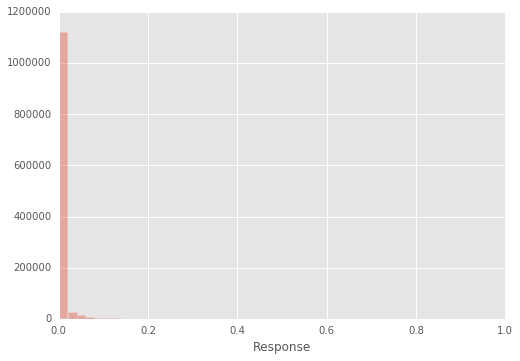

In [8]:
sns.distplot(res['Response'], bins=50, kde=False)

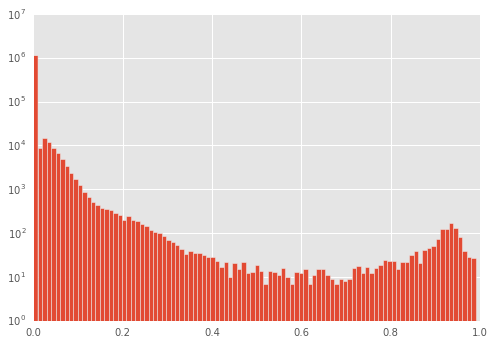

In [9]:
plt.hist(res['Response'], bins=100)
plt.gca().set_yscale("log")

In [10]:
res.ix[pos_index, 'Response'] = 1
res.ix[neg_index, 'Response'] = 0

In [11]:
res = res.astype('int')
res = res.ix[submission_sample.index]

In [12]:
res.head()

,Response
Id,
1,0
2,0
3,0
5,0
8,0


In [13]:
res.to_csv(final_res_file)